In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
img_path = r'./image_file/findContours/fire.png'
background_img_path = r'./image_file/findContours/1.jpg'
img = cv2.imread(img_path)
background_img = cv2.imread(background_img_path)

(-0.5, 1919.5, 1079.5, -0.5)

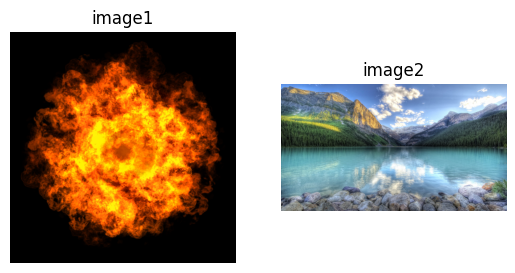

In [7]:
plt.subplot(1, 2, 1)
plt.title('image1')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('image2')
plt.imshow(cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

### resize背景图片

In [8]:
height, width = img.shape[:2]

resize_background_img = cv2.resize(background_img, (width, height))

### 找出image1中的轮廓，并生成轮廓的mask

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 将BGR格式转换成灰度图片

ret, binary = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY) # ret:设定的阈值， binary：二值化后的图像

# cv2.MORPH_CLOSE 进行闭运算， 指的是先进行膨胀操作，再进行腐蚀操作
kernel = np.ones((1, 5), np.uint8)
mask = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, anchor=(2, 0), iterations=6)

mask_inv = cv2.bitwise_not(mask)


contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

n = []
max_contours = []
for i in contours:
    area = cv2.contourArea(i)
    if area > 10000:
        n.append(area)
        max_contours.append(i)

        # with open('point.txt', 'w') as f:
        #     f.write(str(i))

n.sort(reverse=True)

pts = max_contours

(-0.5, 584.5, 598.5, -0.5)

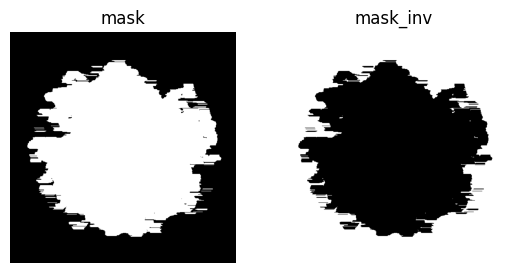

In [16]:
plt.subplot(1, 2, 1)
plt.title('mask')
plt.imshow(mask,cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('mask_inv')
plt.imshow(mask_inv,cmap='gray')
plt.axis('off')

### 根据生成的mask，制作添加背景的图片

In [17]:
dst = cv2.bitwise_and(img, img, mask=mask)  # 用空白的mask去得到图片的轮廓

bkg = cv2.bitwise_and(resize_background_img, resize_background_img, mask=mask_inv)# 用黑的mask去盖住背景图片中的的轮廓

final = dst + bkg  # 将上面两个图片叠加


(-0.5, 584.5, 598.5, -0.5)

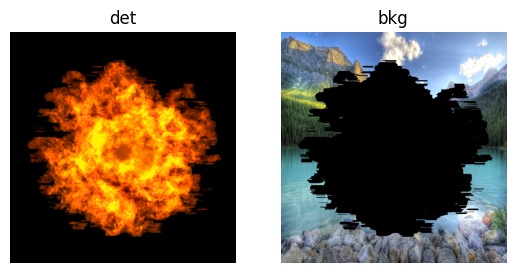

In [20]:
plt.subplot(1, 2, 1)
plt.title('det')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('bkg')
plt.imshow(cv2.cvtColor(bkg, cv2.COLOR_BGR2RGB))
plt.axis('off')

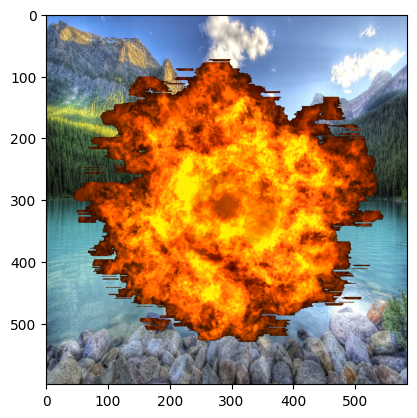

In [18]:
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))